# Import Libraries

In [1]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set Directory Path

In [2]:
dir_path = r"C:\Users\Admin\Downloads\Celebrity Faces Dataset"
images = []
nums = []
img_size = 64
for i, name in tqdm(enumerate(os.listdir(dir_path))):
    folder_path = os.path.join(dir_path, name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img_array = cv2.imread(img_path)
        img_array = cv2.resize(img_array, (img_size, img_size))
        img_array = img_array[:, :, ::-1] / 255.0
        images.append(img_array)
        nums.append(i)
images = np.array(images, dtype = 'float32').reshape(-1, img_size, img_size, 3)
nums = np.array(nums, dtype = 'float32')
images.shape, nums.shape

17it [00:05,  3.29it/s]


((1800, 64, 64, 3), (1800,))

# Explore the Images and pre process them

In [3]:
print("Unique values in nums:", np.unique(nums))
print("Data type of nums:", nums.dtype)

Unique values in nums: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
Data type of nums: float32


In [4]:
nums = nums.astype(int)

# Create a Mappings

In [5]:
# Create a mapping from index to actor name
actor_names = os.listdir(dir_path)
name_to_index = {name: i for i, name in enumerate(actor_names)}
index_to_name = {i: name for name, i in name_to_index.items()}

# Ensure all labels are correctly converted
labels = np.array([name_to_index[name] for name in nums if name in name_to_index])

In [6]:
# Print mappings
print("Name to Index Mapping:", name_to_index)
print("Index to Name Mapping:", index_to_name)

Name to Index Mapping: {'Angelina Jolie': 0, 'Brad Pitt': 1, 'Denzel Washington': 2, 'Hugh Jackman': 3, 'Jennifer Lawrence': 4, 'Johnny Depp': 5, 'Kate Winslet': 6, 'Leonardo DiCaprio': 7, 'Megan Fox': 8, 'Natalie Portman': 9, 'Nicole Kidman': 10, 'Robert Downey Jr': 11, 'Sandra Bullock': 12, 'Scarlett Johansson': 13, 'Tom Cruise': 14, 'Tom Hanks': 15, 'Will Smith': 16}
Index to Name Mapping: {0: 'Angelina Jolie', 1: 'Brad Pitt', 2: 'Denzel Washington', 3: 'Hugh Jackman', 4: 'Jennifer Lawrence', 5: 'Johnny Depp', 6: 'Kate Winslet', 7: 'Leonardo DiCaprio', 8: 'Megan Fox', 9: 'Natalie Portman', 10: 'Nicole Kidman', 11: 'Robert Downey Jr', 12: 'Sandra Bullock', 13: 'Scarlett Johansson', 14: 'Tom Cruise', 15: 'Tom Hanks', 16: 'Will Smith'}


In [7]:
nums = nums.astype(int)

In [8]:
labels = np.array([name_to_index[actor_names[int(label)]] for label in nums])

In [9]:
labels = np.array([index_to_name[int(label)] for label in nums])

In [10]:
# Convert nums to integers
nums = nums.astype(int)

# Create mappings
actor_names = os.listdir(dir_path)
name_to_index = {name: i for i, name in enumerate(actor_names)}
index_to_name = {i: name for name, i in name_to_index.items()}

# Prepare labels with correct mapping
labels = np.array([name_to_index[actor_names[i]] for i in nums])

# Split the data
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)


In [11]:
print("Name to Index Mapping:", name_to_index)
print("Index to Name Mapping:", index_to_name)
print("Unique labels in prepared labels:", np.unique(labels))

Name to Index Mapping: {'Angelina Jolie': 0, 'Brad Pitt': 1, 'Denzel Washington': 2, 'Hugh Jackman': 3, 'Jennifer Lawrence': 4, 'Johnny Depp': 5, 'Kate Winslet': 6, 'Leonardo DiCaprio': 7, 'Megan Fox': 8, 'Natalie Portman': 9, 'Nicole Kidman': 10, 'Robert Downey Jr': 11, 'Sandra Bullock': 12, 'Scarlett Johansson': 13, 'Tom Cruise': 14, 'Tom Hanks': 15, 'Will Smith': 16}
Index to Name Mapping: {0: 'Angelina Jolie', 1: 'Brad Pitt', 2: 'Denzel Washington', 3: 'Hugh Jackman', 4: 'Jennifer Lawrence', 5: 'Johnny Depp', 6: 'Kate Winslet', 7: 'Leonardo DiCaprio', 8: 'Megan Fox', 9: 'Natalie Portman', 10: 'Nicole Kidman', 11: 'Robert Downey Jr', 12: 'Sandra Bullock', 13: 'Scarlett Johansson', 14: 'Tom Cruise', 15: 'Tom Hanks', 16: 'Will Smith'}
Unique labels in prepared labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


# Split the data

In [12]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

# Define the model

In [13]:
class CelebrityRecognitionModel(tf.keras.Model):
    def __init__(self, num_classes):
        super().__init__()
        self.encoder = Sequential([
            layers.Conv2D(32, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D(pool_size=(2, 2), strides=2),

            layers.Conv2D(64, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D(pool_size=(2, 2), strides=2),
            
            layers.Conv2D(128, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D(pool_size=(2, 2), strides=2),

            layers.Flatten(),
            layers.Dense(512, activation='relu'),
            layers.BatchNormalization(),
            layers.Dense(num_classes, activation='softmax')
        ])
    
    def call(self, inputs):
        return self.encoder(inputs)

In [14]:
# Number of classes (actor names)
num_classes = len(actor_names)
num_classes

17

# Compile and Train the Model

In [15]:
model = CelebrityRecognitionModel(num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model

In [16]:
model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val))

Epoch 1/25
45/45 [==============================] - 12s 18ms/step - loss: 3.0055 - accuracy: 0.2042 - val_loss: 3.4352 - val_accuracy: 0.1111
Epoch 2/25
45/45 [==============================] - 0s 10ms/step - loss: 1.4493 - accuracy: 0.5431 - val_loss: 5.0674 - val_accuracy: 0.1000
Epoch 3/25
45/45 [==============================] - 0s 10ms/step - loss: 0.7246 - accuracy: 0.7910 - val_loss: 4.4640 - val_accuracy: 0.1139
Epoch 4/25
45/45 [==============================] - 0s 10ms/step - loss: 0.3013 - accuracy: 0.9194 - val_loss: 3.1678 - val_accuracy: 0.1694
Epoch 5/25
45/45 [==============================] - 0s 9ms/step - loss: 0.0951 - accuracy: 0.9882 - val_loss: 3.3071 - val_accuracy: 0.1639
Epoch 6/25
45/45 [==============================] - 0s 10ms/step - loss: 0.0353 - accuracy: 0.9972 - val_loss: 3.3071 - val_accuracy: 0.1750
Epoch 7/25
45/45 [==============================] - 0s 10ms/step - loss: 0.0175 - accuracy: 0.9979 - val_loss: 3.2297 - val_accuracy: 0.2083
Epoch 8/25
45

# Predict and Visualize Results

In [17]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

12/12 [==============================] - 0s 3ms/step


In [18]:
predicted_names = [index_to_name[i] for i in y_pred_classes]

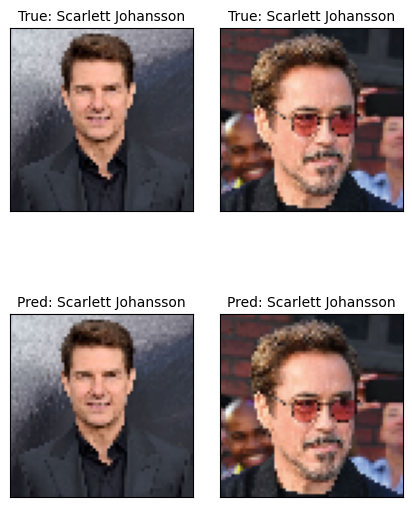

In [27]:
plt.figure(figsize=(15, 6))  
for i in range(2):
    plt.subplot(2, 7, i + 1)
    plt.imshow(X_val[i+4])
    plt.title(f'True: {index_to_name[y_val[i]]}', fontsize=10)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(2, 7, i + 7 + 1)
    plt.imshow(X_val[i+4])
    plt.title(f'Pred: {predicted_names[i]}', fontsize=10)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout(pad=2.0)
plt.show()